<div class="alert alert-warning"></i><strong><h1>CFT Data Science With R: Tutorials</h1></strong><br>By: Seiya David
<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="CFT.png" width="300px" style="display: inline-block; margin: 5px;">
<img src="images.jpg" width="150px" class="pull-right" style="display: inline-block; margin: 0px;">
</div>

<div class="alert alert-success"></i><strong><center><h1>Support Vector Machine</h1></center></strong>
 </div>

### What is Support Vector Machine
Support Vector Machine is a supervised machine learning algorithm which can be used for both regression and classification problems.<br>
The support vector machine constructs an optimal hyperplane for linearly separable data in a multidimensional space using a kernel function. This process of rearranging the objects for optimal separation is known as transformation and occurs through the use of a kernel function.<br>
The support vectors are the data points that lie closest to the optimal hyperplane, these are the most difficult points to classify and directly influence the location of the decision boundary.<br>

[Site to Caret package site](http://topepo.github.io/caret/available-models.html)<br>

![image](svmImage.png)

<div class="alert alert-success"></i><strong><h3>Slack Parameter</h3></strong>
</div>

The variable C, which we will see later in the hands-on session is known as the slack parameter and it serves as the cost parameter that controls the trade-off between the size of the margin and the classification error. If no slack is allowed (often called a **hard margin**) and the data are **linearly separable**, then the support vectors are the points which lie along the supporting hyperplanes. In this case, all of the support vectors lie exactly on the margin. In practice, for complex classifications a **hard margin** may not yield useful results, and a **“soft” margin** is used.In this case, some proportion of data points are allowed to remain inside the margin. The slack parameter is used to control this proportion. A soft margin results in a larger classification error on the training data set. However, it reduces the likelihood of **over-fitting**.

<div class="alert alert-success"></i><strong><h3>Number of Support Vectors</h3></strong>
</div>
The total number of support vectors depends on the amount of allowed slack and the distribution of the data. If a large amount of slack is permitted, there will be a larger number of support vectors than the case where very little slack is permitted. Fewer support vectors means faster classification of test points. This is because the computational complexity of the SVM is linear in the number of support vectors.

<div class="alert alert-info"><i class="icon-lightbulb"></i><strong><h3>Pros and Cons</h3></strong>
</div><br>

**Pros**
- It uses the regularization term to avoid over-fitting
- It does not suffer from local optimal and multi-collinearity

**Cons**
- It is takes long time to build models when the data is very large datasets

<div class="alert alert-success"></i><strong><h3>Hands-On Section</h3></strong><br>
</div>
In this hand-on session, we will apply the SVM (support Vector Machine) technique to classify a dependent variable with two classes or categories."PS" for poorly segmented and "WS" for well segmented. For more information about the dataset,
type any of the following codes on your console after loading the caret package.

?segmentationData

help(segmentationData)

<div class="alert alert-success"></i><strong><h3>1.0 Load required R package(s)</h3></strong><br>

In [1]:
options(warn=-1)
library(caret, verbose = F, quietly = T)

<div class="alert alert-success"></i><strong><h3>2.0 Read in the Data</h3></strong><br>

In [3]:
?segmentationData

In [2]:
data(segmentationData)

# View few rows of the loaded dataset
head(segmentationData)

Cell,Case,Class,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
207827637,Test,PS,143.247705,185,15.71186,4.954802,9.548023,2.214689,1.124509,...,2781,701,1690,392,12.47468,7.609035,2.71410,10.64297,42,14
207932307,Train,PS,133.752037,819,31.92327,206.878517,69.916880,164.153453,1.263158,...,24964,160998,54675,128368,18.80923,56.715352,118.38814,32.16126,215,347
207932463,Train,WS,106.646387,431,28.03883,116.315534,63.941748,106.696602,1.053310,...,11552,47511,26344,43959,17.29564,37.671053,49.47052,21.18553,371,252
207932470,Train,PS,69.150325,298,19.45614,102.294737,28.217544,31.028070,1.202625,...,5545,28870,8042,8843,13.81897,30.005643,24.74954,13.39283,487,295
207932455,Test,PS,2.887837,285,24.27574,112.415441,20.474265,40.577206,1.109333,...,6603,30306,5569,11037,15.40797,20.504288,45.45046,13.19856,283,159
207827656,Test,WS,40.748298,172,325.93333,653.606061,128.690909,346.854545,1.005831,...,53779,107681,21234,57231,115.00462,70.918444,184.69291,15.53666,191,127


<div class="alert alert-danger"></i></i><strong>Try it out!</strong><br>Using Base R technique and dplyr package exclude the first two features of the imported/loaded dataset.</strong><br>

In [3]:
segmentationData <- segmentationData[, -c(1,2)]

<div class="alert alert-success"></i><strong><h3>3.0 Exploratory Data Analysis</h3></strong><br>

In [4]:
# Lets view the dataset again to ensure the change occurred
head(segmentationData)

Class,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
PS,143.247705,185,15.71186,4.954802,9.548023,2.214689,1.124509,0.9196827,29.51923,...,2781,701,1690,392,12.47468,7.609035,2.71410,10.64297,42,14
PS,133.752037,819,31.92327,206.878517,69.916880,164.153453,1.263158,0.7970801,31.87500,...,24964,160998,54675,128368,18.80923,56.715352,118.38814,32.16126,215,347
WS,106.646387,431,28.03883,116.315534,63.941748,106.696602,1.053310,0.9354750,32.48771,...,11552,47511,26344,43959,17.29564,37.671053,49.47052,21.18553,371,252
PS,69.150325,298,19.45614,102.294737,28.217544,31.028070,1.202625,0.8658291,26.73228,...,5545,28870,8042,8843,13.81897,30.005643,24.74954,13.39283,487,295
PS,2.887837,285,24.27574,112.415441,20.474265,40.577206,1.109333,0.9568124,31.58065,...,6603,30306,5569,11037,15.40797,20.504288,45.45046,13.19856,283,159
WS,40.748298,172,325.93333,653.606061,128.690909,346.854545,1.005831,0.9926363,92.56291,...,53779,107681,21234,57231,115.00462,70.918444,184.69291,15.53666,191,127


<div class="alert alert-danger"></i></i><strong>Try it out!</strong><br>Check for missing values</strong><br>

In [6]:
sum(is.na(segmentationData))

[1] 0

In [7]:
missing <- function(x){
    sum(is.na(x))
}

In [8]:
apply(segmentationData,2, missing)

Class                AngleCh1                 AreaCh1 
                      0                       0                       0 
            AvgIntenCh1             AvgIntenCh2             AvgIntenCh3 
                      0                       0                       0 
            AvgIntenCh4  ConvexHullAreaRatioCh1 ConvexHullPerimRatioCh1 
                      0                       0                       0 
    DiffIntenDensityCh1     DiffIntenDensityCh3     DiffIntenDensityCh4 
                      0                       0                       0 
        EntropyIntenCh1         EntropyIntenCh3         EntropyIntenCh4 
                      0                       0                       0 
          EqCircDiamCh1         EqEllipseLWRCh1   EqEllipseOblateVolCh1 
                      0                       0                       0 
 EqEllipseProlateVolCh1         EqSphereAreaCh1          EqSphereVolCh1 
                      0                       0                       0 
         FiberAlign2Ch3          FiberAlign2Ch4          FiberLengthCh1 
                      0                       0                       0 
          FiberWidthCh1         IntenCoocASMCh3         IntenCoocASMCh4 
                      0                       0                       0 
   IntenCoocContrastCh3    IntenCoocContrastCh4     IntenCoocEntropyCh3 
                      0                       0                       0 
    IntenCoocEntropyCh4         IntenCoocMaxCh3         IntenCoocMaxCh4 
                      0                       0                       0 
           KurtIntenCh1            KurtIntenCh3            KurtIntenCh4 
                      0                       0                       0 
              LengthCh1      NeighborAvgDistCh1      NeighborMinDistCh1 
                      0                       0                       0 
     NeighborVarDistCh1                PerimCh1             ShapeBFRCh1 
                      0                       0                       0 
            ShapeLWRCh1             ShapeP2ACh1            SkewIntenCh1 
                      0                       0                       0 
           SkewIntenCh3            SkewIntenCh4       SpotFiberCountCh3 
                      0                       0                       0 
      SpotFiberCountCh4           TotalIntenCh1           TotalIntenCh2 
                      0                       0                       0 
          TotalIntenCh3           TotalIntenCh4             VarIntenCh1 
                      0                       0                       0 
            VarIntenCh3             VarIntenCh4                WidthCh1 
                      0                       0                       0 
              XCentroid               YCentroid 
                      0                       0

In [9]:
# Let us view the structure of the dataset
str(segmentationData)

'data.frame':	2019 obs. of  59 variables:
 $ Class                  : Factor w/ 2 levels "PS","WS": 1 1 2 1 1 2 2 1 2 2 ...
 $ AngleCh1               : num  143.25 133.75 106.65 69.15 2.89 ...
 $ AreaCh1                : int  185 819 431 298 285 172 177 251 495 384 ...
 $ AvgIntenCh1            : num  15.7 31.9 28 19.5 24.3 ...
 $ AvgIntenCh2            : num  4.95 206.88 116.32 102.29 112.42 ...
 $ AvgIntenCh3            : num  9.55 69.92 63.94 28.22 20.47 ...
 $ AvgIntenCh4            : num  2.21 164.15 106.7 31.03 40.58 ...
 $ ConvexHullAreaRatioCh1 : num  1.12 1.26 1.05 1.2 1.11 ...
 $ ConvexHullPerimRatioCh1: num  0.92 0.797 0.935 0.866 0.957 ...
 $ DiffIntenDensityCh1    : num  29.5 31.9 32.5 26.7 31.6 ...
 $ DiffIntenDensityCh3    : num  13.8 43.1 36 22.9 21.7 ...
 $ DiffIntenDensityCh4    : num  6.83 79.31 51.36 26.39 25.03 ...
 $ EntropyIntenCh1        : num  4.97 6.09 5.88 5.42 5.66 ...
 $ EntropyIntenCh3        : num  4.37 6.64 6.68 5.44 5.29 ...
 $ EntropyIntenCh4        : 

In [10]:
summary(segmentationData)

 Class        AngleCh1            AreaCh1        AvgIntenCh1     
 PS:1300   Min.   :  0.03088   Min.   : 150.0   Min.   :  15.16  
 WS: 719   1st Qu.: 53.89221   1st Qu.: 193.0   1st Qu.:  35.36  
           Median : 90.58877   Median : 253.0   Median :  62.34  
           Mean   : 90.49340   Mean   : 320.3   Mean   : 126.07  
           3rd Qu.:126.68201   3rd Qu.: 362.5   3rd Qu.: 143.19  
           Max.   :179.93932   Max.   :2186.0   Max.   :1418.63  
  AvgIntenCh2     AvgIntenCh3       AvgIntenCh4       ConvexHullAreaRatioCh1
 Min.   :  1.0   Min.   :   0.12   Min.   :  0.5633   Min.   :1.006         
 1st Qu.: 45.0   1st Qu.:  33.50   1st Qu.: 40.6797   1st Qu.:1.065         
 Median :173.5   Median :  67.43   Median : 90.2500   Median :1.149         
 Mean   :189.1   Mean   :  96.42   Mean   :140.7016   Mean   :1.206         
 3rd Qu.:279.3   3rd Qu.: 127.34   3rd Qu.:191.1704   3rd Qu.:1.281         
 Max.   :989.5   Max.   :1205.51   Max.   :886.8375   Max.   :2.900         

<div class="alert alert-success"></i><strong><h3>4.0 Training and Testing Data Split</h3></strong><br>

<div class="alert alert-danger"></i></i><strong>Try it out!</strong><br>Using the loaded caret function "createDataPartition", create a train/test split. Make the training dataset 70% and use a seed of 101</strong><br>

In [5]:
# Training SVM Models
# Load the data and create training and test samples.
# use set.seed for reproducibility
set.seed(101)

# split the dataset
trainRows <- createDataPartition(segmentationData$Class,p=0.7,list=FALSE)
trainData <- segmentationData[trainRows, ]
testData  <- segmentationData[-trainRows, ]

In [6]:
# View the class count Since the the classes are very imbalance we would have to instruct the model to balance it
table(segmentationData$Class)


  PS   WS 
1300  719 

In [8]:
# Set the Tuning parameters for all models that will be developed
set.seed(100)                     
# setup trainControl
ctrl <- trainControl(method="repeatedcv",                   # 10 fold cross validation
                     repeats=5,                             # 5 repeats of cv
                     summaryFunction=twoClassSummary,       # To get AUROC, use multiClassSummary otherwise
                     classProbs=TRUE,
                     sampling='up')

In [9]:
# set the number of C for the svmLinear model.
# this is the only tuning parameter for this model
# if in doubt check the caret package page
grid <- expand.grid(C = c(0.1, 0.25, 0.50, 0.75)) 

# Train and Tune the SVM with a linear kernel
svmLin_mod <- train(Class ~ ., data = trainData, 
                    method = "svmLinear",
                    preProc = c("center","scale"),
                    metric="ROC",
                    tuneGrid = grid,
                    trControl=ctrl)
svmLin_mod

line search fails -1.145547 0.09106612 1.041777e-05 -1.538609e-06 -3.21873e-08 1.212841e-08 -3.539809e-13

Support Vector Machines with Linear Kernel 

1414 samples
  58 predictor
   2 classes: 'PS', 'WS' 

Pre-processing: centered (58), scaled (58) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1272, 1272, 1273, 1273, 1272, 1273, ... 
Addtional sampling using up-sampling prior to pre-processing

Resampling results across tuning parameters:

  C     ROC        Sens       Spec     
  0.10  0.8868924  0.8074725  0.8280471
  0.25  0.8812540  0.8116170  0.8343257
  0.50  0.8893850  0.8167033  0.8216549
  0.75  0.8873760  0.8127473  0.8233020

ROC was used to select the optimal model using the largest value.
The final value used for the model was C = 0.5.

In [10]:
# Set the Tuning parameters for Radial Kernel, this has two parameters
# Setup model tuning  set the number of sigma and C
grid <- expand.grid(sigma = c(0.01, 0.015, 0.2),
                    C = c(0.25, 0.5, 0.75, 1, 1.25, 1.5))

# Train and Tune the SVM for Radial Kernel
svmRad_mod <- train(Class ~ ., data = trainData, 
                    method = "svmRadial",
                    preProc = c("center", "scale"), 
                    metric="ROC", 
                    tuneGrid = grid,
                    trControl=ctrl)

svmRad_mod

Support Vector Machines with Radial Basis Function Kernel 

1414 samples
  58 predictor
   2 classes: 'PS', 'WS' 

Pre-processing: centered (58), scaled (58) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1273, 1273, 1273, 1272, 1272, 1273, ... 
Addtional sampling using up-sampling prior to pre-processing

Resampling results across tuning parameters:

  sigma  C     ROC        Sens       Spec     
  0.010  0.25  0.8866175  0.7991209  0.8385255
  0.010  0.50  0.8934991  0.8068132  0.8424941
  0.010  0.75  0.8952167  0.8120879  0.8401176
  0.010  1.00  0.8980382  0.8186813  0.8389725
  0.010  1.25  0.8988592  0.8213187  0.8377647
  0.010  1.50  0.9006306  0.8272527  0.8301725
  0.015  0.25  0.8898016  0.8017582  0.8326039
  0.015  0.50  0.8961220  0.8175824  0.8333725
  0.015  0.75  0.8981451  0.8230769  0.8333569
  0.015  1.00  0.8990092  0.8287912  0.8167059
  0.015  1.25  0.8996708  0.8338462  0.8146745
  0.015  1.50  0.8992594  0.8367033  0.8059608

In [11]:
# Set the Tuning parameters for Polynomial Kernel
grid <- expand.grid(C = c(0.25, 0.5, 0.75, 1, 1.25, 1.5),
                    degree=c(1, 2, 3, 4),
                    scale=c(.001, 0.01, 0.1)) 

# Train and Tune the SVM with Polynomial Kernel
svmPoly_mod <- train(Class ~ ., data = trainData, 
                     method = "svmPoly",
                     preProc = c("center","scale"),
                     metric="ROC",tuneLength = 3,
                     trControl=ctrl)
svmPoly_mod

Support Vector Machines with Polynomial Kernel 

1414 samples
  58 predictor
   2 classes: 'PS', 'WS' 

Pre-processing: centered (58), scaled (58) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1273, 1273, 1273, 1272, 1273, 1272, ... 
Addtional sampling using up-sampling prior to pre-processing

Resampling results across tuning parameters:

  degree  scale  C     ROC        Sens       Spec     
  1       0.001  0.25  0.8572105  0.7617582  0.8214588
  1       0.001  0.50  0.8613320  0.7670330  0.8250118
  1       0.001  1.00  0.8657180  0.7709890  0.8305412
  1       0.010  0.25  0.8694865  0.7786813  0.8353176
  1       0.010  0.50  0.8732804  0.7859341  0.8345490
  1       0.010  1.00  0.8781037  0.7907692  0.8361490
  1       0.100  0.25  0.8837978  0.7967033  0.8293098
  1       0.100  0.50  0.8872603  0.8028571  0.8281098
  1       0.100  1.00  0.8878041  0.8059341  0.8301176
  2       0.001  0.25  0.8623843  0.7692308  0.8250118
  2       0.001 

In [12]:
#Let us Compare models all the models now
comparisons <- resamples(list(linear=svmLin_mod, radial=svmRad_mod,Polynomial=svmPoly_mod))
summary(comparisons)
#comparisons$values


Call:
summary.resamples(object = comparisons)

Models: linear, radial, Polynomial 
Number of resamples: 50 

ROC 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
linear     0.8470157 0.8745604 0.8861883 0.8893850 0.9019619 0.9407455    0
radial     0.8413187 0.8873077 0.9040444 0.9006306 0.9129498 0.9461323    0
Polynomial 0.8134066 0.8800496 0.8971429 0.8942133 0.9123012 0.9351433    0

Sens 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
linear     0.7142857 0.7912088 0.8131868 0.8167033 0.8461538 0.9340659    0
radial     0.7362637 0.7912088 0.8241758 0.8272527 0.8571429 0.9230769    0
Polynomial 0.7362637 0.7912088 0.8241758 0.8184615 0.8434066 0.9120879    0

Spec 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
linear     0.700000 0.7882353 0.8235294 0.8216549 0.8600000 0.9200000    0
radial     0.700000 0.8009804 0.8400000 0.8301725 0.8620588 0.9019608    0
Polynomial 0.745098 0.8200000 0.840000

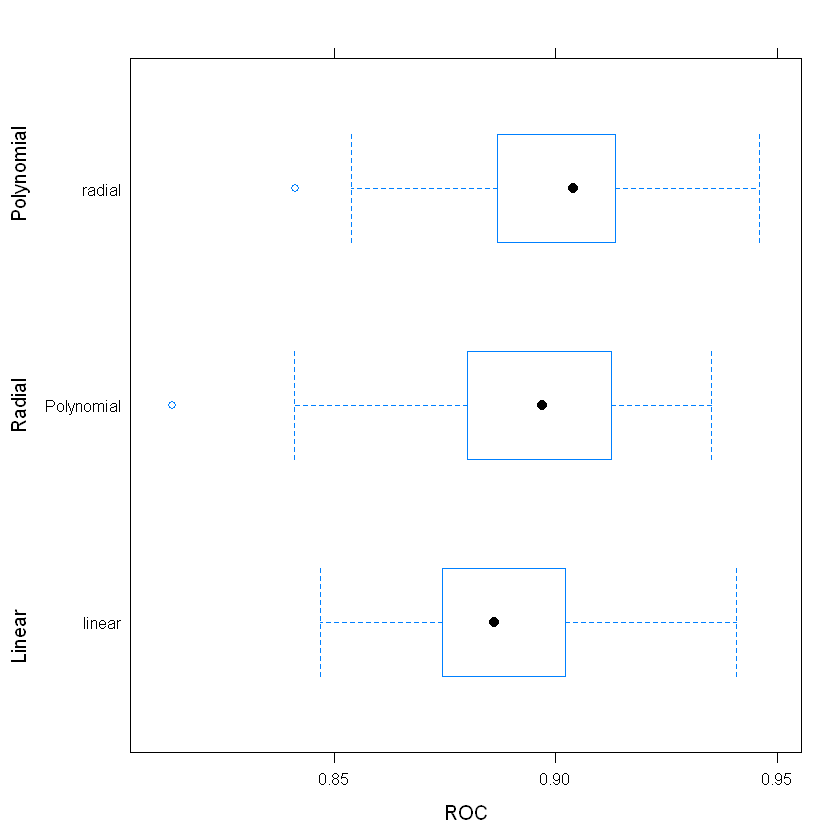

In [13]:
# make a boxplot to compare kernel performance
bwplot(comparisons,metric="ROC", ylab =c("Linear", "Radial","Polynomial"))  # boxplot

In [14]:
# Predict
pred <- predict(svmRad_mod, testData)
caret::confusionMatrix(pred, testData$Class, positive = "WS")

Confusion Matrix and Statistics

          Reference
Prediction  PS  WS
        PS 323  49
        WS  67 166
                                          
               Accuracy : 0.8083          
                 95% CI : (0.7746, 0.8389)
    No Information Rate : 0.6446          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5892          
                                          
 Mcnemar's Test P-Value : 0.1145          
                                          
            Sensitivity : 0.7721          
            Specificity : 0.8282          
         Pos Pred Value : 0.7124          
         Neg Pred Value : 0.8683          
             Prevalence : 0.3554          
         Detection Rate : 0.2744          
   Detection Prevalence : 0.3851          
      Balanced Accuracy : 0.8001          
                                          
       'Positive' Class : WS              
                              